In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

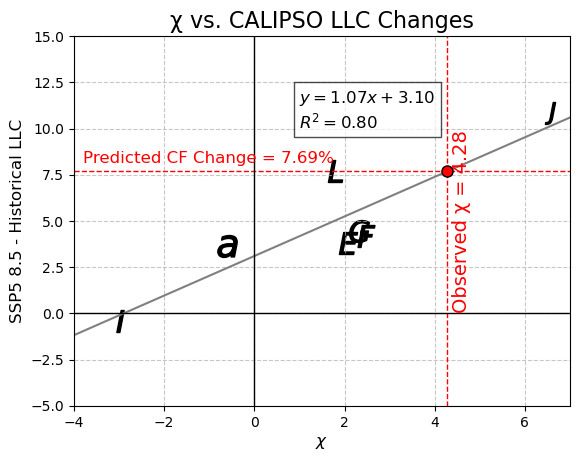

In [10]:
model_data = {
    'E3SM-1.0':      {'chi': 2.08, 'llc_diff': 3.80},
    'E3SM-1.1':      {'chi': 2.47, 'llc_diff': 4.18},
    'E3SM-1.1-ECA':  {'chi': 2.31, 'llc_diff': 4.47},
    'GFDL-CM4':      {'chi': -2.97, 'llc_diff': -0.41},
    'IPSL-CM5':      {'chi': -0.61, 'llc_diff': 3.62},
    'IPSL-CM6':      {'chi': 6.56, 'llc_diff': 10.82},
    'MRI-ESM2-0':    {'chi': 1.79, 'llc_diff': 7.69}
}

labels = list(model_data.keys())
x = np.array([model_data[m]['chi'] for m in labels])
y = np.array([model_data[m]['llc_diff'] for m in labels])
symbols = ['E', 'F', 'G', 'I', 'a', 'J', 'L']

fig, ax = plt.subplots()

# Scatter points with model-specific symbols
for i, label in enumerate(labels):
    ax.scatter(
        x[i], y[i], color='black', marker='$'+symbols[i]+'$', 
        s=250, label=label, edgecolors='black'
    )

# Axis labels and limits
ax.set_xlabel(r'$\chi$', fontsize=12)
ax.set_ylabel('SSP5 8.5 - Historical LLC', fontsize=12)
ax.set_xlim(-4, 7)
ax.set_ylim(-5, 15)

# Best fit line
slope, intercept = np.polyfit(x, y, 1)
x_fit = np.array([-4, 7])
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='gray', linestyle='-', linewidth=1.5, label='Best Fit')

# R² value
y_pred = slope * x + intercept
r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))
line_eq = f"$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r_squared:.2f}$"
ax.text(1.0, 10, line_eq, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7))

# Observed χ line and predicted CF change
x_intersect = 4.28
y_intersect = slope * x_intersect + intercept

# Vertical red dashed line for observed χ
ax.axvline(x=x_intersect, color='red', linestyle='--', linewidth=1)
# Horizontal red dashed line for predicted CF change
ax.axhline(y=y_intersect, color='red', linestyle='--', linewidth=1)

# Red marker at intersection
ax.plot(x_intersect, y_intersect, 'o', color='red', markersize=8, markeredgecolor='black')

# Labels for observed χ and predicted CF change
ax.text(x_intersect + 0.1, 5, 'Observed χ = 4.28', color='red', fontsize=14,
        ha='left', va='center', rotation=90)
ax.text(-3.8, y_intersect + 0.3, f'Predicted CF Change = {y_intersect:.2f}%', color='red',
        fontsize=12, ha='left', va='bottom')

# Reference lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Grid and title
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('χ vs. CALIPSO LLC Changes', fontsize=16)

#plt.savefig('Chi_LLC_Change_Correlation.png', dpi=300, bbox_inches='tight')
plt.show()